### PROJECT

In [94]:
import pandas as pd
import numpy as np

In [95]:
Divar_info = pd.read_csv('Divar.csv')
Divar_info.info()
Divar_info

C:\Users\moein\AppData\Local\Temp\ipykernel_4964\129268648.py:1: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  Divar_info = pd.read_csv('Divar.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1000000 non-null  int64  
 1   cat2_slug                   1000000 non-null  object 
 2   cat3_slug                   999999 non-null   object 
 3   city_slug                   999998 non-null   object 
 4   neighborhood_slug           437139 non-null   object 
 5   created_at_month            1000000 non-null  object 
 6   user_type                   288882 non-null   object 
 7   description                 1000000 non-null  object 
 8   title                       999946 non-null   object 
 9   rent_mode                   352994 non-null   object 
 10  rent_value                  351322 non-null   float64
 11  rent_to_single              19 non-null       object 
 12  rent_type                   103961 non-null   object 
 13

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,residential-sell,apartment-sell,kermanshah,NaN,2024-07-01 00:00:00,مشاور املاک,~~~مشاورین املاک قبادی~~~\n■جنوبی تک واحدی\n■د...,آپارتمان ۱۸۰ متری وحدت غربی,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.350235,47.083241,500.0
999996,999996,residential-rent,apartment-rent,tehran,darya,2024-07-01 00:00:00,مشاور املاک,نوساز \n\n تک واحدی\n\nشخصی ساز\n\nروف گا...,آپارتمان ۱۱۰ متری سعادت آباد دریا,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.770454,51.369099,500.0
999997,999997,residential-sell,house-villa-sell,yazd,NaN,2024-11-01 00:00:00,NaN,سلام ودرود\nفروش منزل مسکونی واقع در خیابان ان...,منزل فروشی. خیابان انقلاب نرسیده به کارخانه...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999998,999998,temporary-rent,suite-apartment,bandar-anzali,NaN,2024-09-01 00:00:00,NaN,سویت بدون خواب (روبه دریا و معمولی)\nسویت ۱خوا...,مجتمع ویلایی کنار ساحل پاسداران,NaN,...,NaN,5.0,5.0,NaN,3000000.0,NaN,NaN,37.483501,49.438721,NaN


In [96]:
Divar_info['rent_mode'].value_counts()

rent_mode
مقطوع     292081
مجانی      59241
توافقی      1672
Name: count, dtype: int64

In [97]:
Divar_info['deal_type'] = Divar_info.apply(lambda row: 'rent' if pd.notna(row['rent_mode']) else 'sale' , axis = 1)

In [98]:
Divar_info['deal_type'].value_counts()

deal_type
sale    647006
rent    352994
Name: count, dtype: int64

In [99]:
Divar_info['created_at_month'] = pd.to_datetime(Divar_info['created_at_month'])
Divar_info

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius,deal_type
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0,sale
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,sale
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN,rent
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rent
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,residential-sell,apartment-sell,kermanshah,NaN,2024-07-01,مشاور املاک,~~~مشاورین املاک قبادی~~~\n■جنوبی تک واحدی\n■د...,آپارتمان ۱۸۰ متری وحدت غربی,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,34.350235,47.083241,500.0,sale
999996,999996,residential-rent,apartment-rent,tehran,darya,2024-07-01,مشاور املاک,نوساز \n\n تک واحدی\n\nشخصی ساز\n\nروف گا...,آپارتمان ۱۱۰ متری سعادت آباد دریا,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,35.770454,51.369099,500.0,rent
999997,999997,residential-sell,house-villa-sell,yazd,NaN,2024-11-01,NaN,سلام ودرود\nفروش منزل مسکونی واقع در خیابان ان...,منزل فروشی. خیابان انقلاب نرسیده به کارخانه...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sale
999998,999998,temporary-rent,suite-apartment,bandar-anzali,NaN,2024-09-01,NaN,سویت بدون خواب (روبه دریا و معمولی)\nسویت ۱خوا...,مجتمع ویلایی کنار ساحل پاسداران,NaN,...,5.0,5.0,NaN,3000000.0,NaN,NaN,37.483501,49.438721,NaN,sale


In [100]:
Divar_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 62 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   Unnamed: 0                  1000000 non-null  int64         
 1   cat2_slug                   1000000 non-null  object        
 2   cat3_slug                   999999 non-null   object        
 3   city_slug                   999998 non-null   object        
 4   neighborhood_slug           437139 non-null   object        
 5   created_at_month            1000000 non-null  datetime64[ns]
 6   user_type                   288882 non-null   object        
 7   description                 1000000 non-null  object        
 8   title                       999946 non-null   object        
 9   rent_mode                   352994 non-null   object        
 10  rent_value                  351322 non-null   float64       
 11  rent_to_single           

In [101]:
Divar_info["year_month"] = Divar_info["created_at_month"].dt.to_period("M")

In [102]:
Divar_info

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius,deal_type,year_month
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0,sale,2024-08
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,sale,2024-05
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN,rent,2024-10
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rent,2024-06
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sale,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,residential-sell,apartment-sell,kermanshah,NaN,2024-07-01,مشاور املاک,~~~مشاورین املاک قبادی~~~\n■جنوبی تک واحدی\n■د...,آپارتمان ۱۸۰ متری وحدت غربی,NaN,...,NaN,NaN,NaN,NaN,NaN,34.350235,47.083241,500.0,sale,2024-07
999996,999996,residential-rent,apartment-rent,tehran,darya,2024-07-01,مشاور املاک,نوساز \n\n تک واحدی\n\nشخصی ساز\n\nروف گا...,آپارتمان ۱۱۰ متری سعادت آباد دریا,مقطوع,...,NaN,NaN,NaN,NaN,NaN,35.770454,51.369099,500.0,rent,2024-07
999997,999997,residential-sell,house-villa-sell,yazd,NaN,2024-11-01,NaN,سلام ودرود\nفروش منزل مسکونی واقع در خیابان ان...,منزل فروشی. خیابان انقلاب نرسیده به کارخانه...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sale,2024-11
999998,999998,temporary-rent,suite-apartment,bandar-anzali,NaN,2024-09-01,NaN,سویت بدون خواب (روبه دریا و معمولی)\nسویت ۱خوا...,مجتمع ویلایی کنار ساحل پاسداران,NaN,...,5.0,NaN,3000000.0,NaN,NaN,37.483501,49.438721,NaN,sale,2024-09


In [103]:
ads_per_month = Divar_info.groupby(["year_month", "deal_type"]).size().reset_index(name="count")
ads_per_month

,year_month,deal_type,count
0,2020-02,sale,1
1,2020-12,sale,1
2,2021-02,sale,1
3,2021-05,sale,1
4,2021-06,sale,1
...,...,...,...
66,2025-01,rent,288
67,2025-01,sale,851
68,2025-02,rent,21
69,2025-02,sale,127


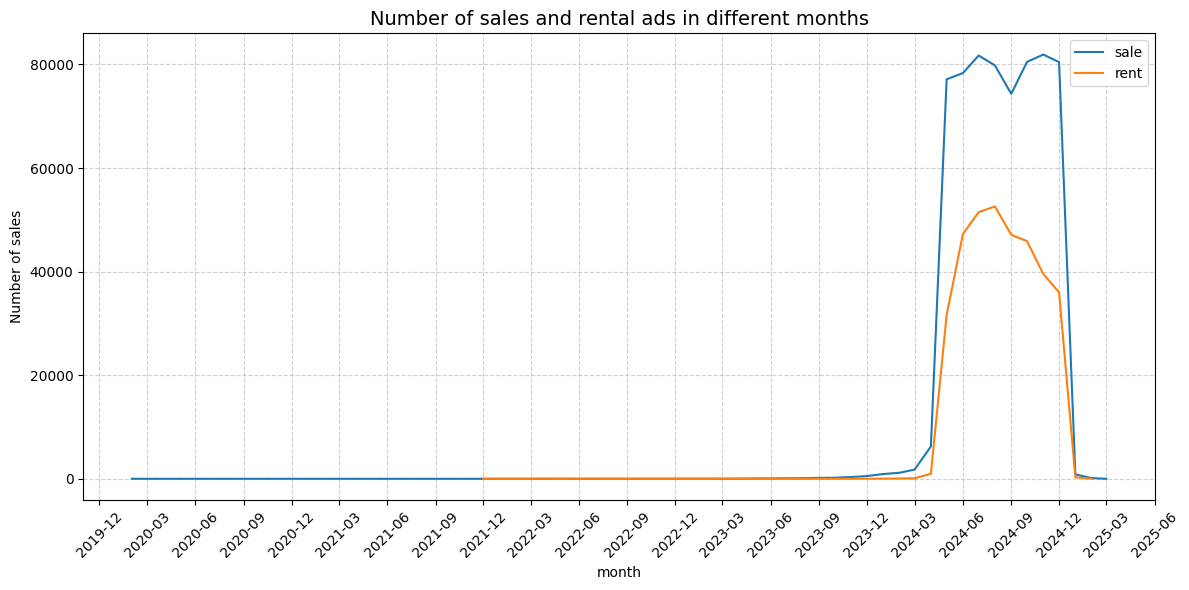

In [128]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12,6))

for deal in ads_per_month["deal_type"].unique():
    subset = ads_per_month[ads_per_month["deal_type"] == deal]
    plt.plot(subset["year_month"].dt.to_timestamp(), subset["count"], label=deal)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

plt.xticks(rotation=45)
plt.xlabel("month")
plt.ylabel('Number of sales')
plt.title('Number of sales and rental ads in different months', fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [105]:
Divar_info[['deal_type','rent_mode','rent_value']]

,deal_type,rent_mode,rent_value
0,sale,NaN,NaN
1,sale,NaN,NaN
2,rent,مقطوع,26000000.0
3,rent,مقطوع,95000000.0
4,sale,NaN,NaN
...,...,...,...
999995,sale,NaN,NaN
999996,rent,مقطوع,45000000.0
999997,sale,NaN,NaN
999998,sale,NaN,NaN


In [106]:
avg_rent = Divar_info[Divar_info['rent_value'].notna() & (Divar_info['rent_value'] > 0)]

In [107]:
avg_rent['rent_mode'].value_counts()

rent_mode
مقطوع    292081
Name: count, dtype: int64

In [113]:
avg_rent['avg_rent_value'] = avg_rent.groupby('year_month')['rent_value'].transform('mean')
avg_rent.sort_values('year_month')


C:\Users\moein\AppData\Local\Temp\ipykernel_4964\1520074266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_rent['avg_rent_value'] = avg_rent.groupby('year_month')['rent_value'].transform('mean')


,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius,deal_type,year_month,avg_rent_value
799358,799358,commercial-rent,shop-rent,tehran,central-janat-abad,2022-06-01,مشاور املاک,44 متر تجاری ( قابلیت راه اندازی 2 شغل ) با سر...,44 مترتجاری شیک مناسب تمام مشاغل,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,300.0,rent,2022-06,3.503333e+07
517398,517398,residential-rent,apartment-rent,fasham-city,NaN,2022-06-01,NaN,◾۱۳۰ متر اپارتمان در جاده شمشک\n◾دارای ۲ اتاق ...,۱۳۰ متر اپارتمان در جاده شمشک,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rent,2022-06,3.503333e+07
936228,936228,residential-rent,apartment-rent,fasham-city,NaN,2022-06-01,مشاور املاک,◾۱۵۴ متر اپارتمان سوپر لوکس\n◾دارای ۳ اتاق خوا...,۱۵۴ متر اپارتمان فول امکانات,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,300.0,rent,2022-06,3.503333e+07
43719,43719,residential-rent,apartment-rent,fasham-city,NaN,2022-07-01,مشاور املاک,◾۱۶۰متر اپارتمان نوساز\n◾دارای ۳ اتاق خواب\n◾و...,۱۶۰ متر اپارتمان نوساز,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,300.0,rent,2022-07,4.500000e+07
944286,944286,residential-rent,house-villa-rent,fasham-city,NaN,2022-08-01,مشاور املاک,◾۸۰۰متر زمین ۱۳۰ بنای دوبلکس در اوشان\n◾دارای ...,۸۰۰متر زمین ۱۳۰ متر بنا دوبلکس,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,300.0,rent,2022-08,7.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76554,76554,commercial-rent,shop-rent,yasuj,NaN,2025-02-01,NaN,درود و احترام \n\n✅رهن و اجاره یک باب مغازه تج...,رهن و اجاره مغازه / راهنمایی/ 36 متری,مقطوع,...,NaN,NaN,NaN,NaN,30.652863,51.606739,NaN,rent,2025-02,3.390062e+07
427386,427386,residential-rent,apartment-rent,babolsar,NaN,2025-02-01,NaN,سازه واقع در خیابان محبوبی-قائم \nتک واحدی با ...,اجاره آپارتمان تک واحدی در محبوبی,مقطوع,...,NaN,NaN,NaN,NaN,36.697052,52.654724,NaN,rent,2025-02,3.390062e+07
625642,625642,residential-rent,house-villa-rent,sorkhrood,NaN,2025-02-01,NaN,به نام خداوندصداقت\n\nرهن ویلا در شهرک برند وب...,اجاره ویلا سالانه*۴۰۰متری*خانه دریا*سرخرود,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rent,2025-02,3.390062e+07
777102,777102,residential-rent,house-villa-rent,sorkhrood,NaN,2025-02-01,NaN,به نام خداوند صداقت \n\nویلا درلوکیشن بینظیر ...,اجاره ویلا*استخردار ساحلی*فول فرنیش*سرخرود,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rent,2025-02,3.390062e+07


In [114]:
avg_rent

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius,deal_type,year_month,avg_rent_value
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN,rent,2024-10,9.146603e+10
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rent,2024-06,2.569155e+10
5,5,residential-rent,apartment-rent,ahvaz,mellirah,2024-09-01,NaN,اپارتمان ۱۰۰متری واحد جلو دارای دو اتاق خواب ک...,اپارتمان ۱۰۰متری ملی راه واحد جلو,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rent,2024-09,5.954394e+10
6,6,commercial-rent,office-rent,kermanshah,NaN,2024-11-01,NaN,♦مشاورین املاک سیب♦\n✅️کد:G۱۰۵\n♦با سالها سابق...,واحداداری ۸۰متری ۲۲بهمن(برق),مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rent,2024-11,5.522896e+10
15,15,commercial-rent,office-rent,rasht,moalem,2024-06-01,مشاور املاک,✅ تجاری \n✅سه اتاقه\n✅ ۸۵متر مفید\n✅ آسانسور\n...,تحاری ۸۵ متر سه اتاقه طبقه ۵ فاز یک معلم,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rent,2024-06,2.569155e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999984,999984,commercial-rent,shop-rent,qarchak-city,NaN,2024-08-01,NaN,مغازه تجاری بهر بلوار باقرآباد\nهمکف دارای کلی...,بهر بلوار باقرآباد ۲۰۰ متر تجاری همکف,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rent,2024-08,5.049294e+10
999985,999985,commercial-rent,shop-rent,parand-city,NaN,2024-07-01,NaN,رهن و اجاره مغازه 15 متری واقع در کوزو 5 خ اما...,رهن و اجاره مغازه 15 متری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rent,2024-07,2.482797e+10
999987,999987,residential-rent,apartment-rent,bonab,NaN,2024-10-01,NaN,به تمامی خدمات رفاهی از جمله سوپر مارکت و مدرس...,آپارتمان ۸۵ متر مسکن مهر ساختمان نگین,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rent,2024-10,9.146603e+10
999993,999993,residential-rent,apartment-rent,mashhad,elahiyehblvd,2024-06-01,مشاور املاک,با سلام \n50متر یکخوابه \nطبقه اول \nجای پارک ...,50متر یکخوابه حاشیه اقدسیه,مقطوع,...,NaN,NaN,NaN,NaN,36.374050,59.485794,500.0,rent,2024-06,2.569155e+10


In [115]:
import jdatetime

avg_rent["year_month_shamsi"] = avg_rent["year_month"].dt.to_timestamp().apply(
    lambda x: jdatetime.date.fromgregorian(date=x.date()).strftime("%Y-%m")
)


C:\Users\moein\AppData\Local\Temp\ipykernel_4964\572476787.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_rent["year_month_shamsi"] = avg_rent["year_month"].dt.to_timestamp().apply(


In [116]:
avg_rent_per_month = avg_rent[['year_month_shamsi' , 'avg_rent_value']]

In [117]:
avg_rent_per_month

,year_month_shamsi,avg_rent_value
2,1403-07,9.146603e+10
3,1403-03,2.569155e+10
5,1403-06,5.954394e+10
6,1403-08,5.522896e+10
15,1403-03,2.569155e+10
...,...,...
999984,1403-05,5.049294e+10
999985,1403-04,2.482797e+10
999987,1403-07,9.146603e+10
999993,1403-03,2.569155e+10


In [118]:
avg_rent_per_month.year_month_shamsi.value_counts()

year_month_shamsi
1403-05    43495
1403-04    42779
1403-06    39545
1403-03    38882
1403-07    38291
1403-08    32840
1403-09    29529
1403-02    25564
1403-01      753
1403-10      201
1402-12       80
1402-11       45
1402-10       26
1403-11       18
1402-09       11
1402-08        8
1402-07        6
1401-03        3
1402-06        2
1401-04        1
1402-05        1
1401-05        1
Name: count, dtype: int64

In [122]:
avg_rent_per_month = avg_rent_per_month.groupby('year_month_shamsi')['avg_rent_value'].mean().reset_index().sort_values(by = 'year_month_shamsi')

In [123]:
avg_rent_per_month

,year_month_shamsi,avg_rent_value
0,1401-03,3.503333e+07
1,1401-04,4.500000e+07
2,1401-05,7.000000e+07
3,1402-05,6.500000e+07
4,1402-06,2.250000e+07
5,1402-07,4.558333e+07
6,1402-08,5.855000e+07
7,1402-09,3.491818e+07
8,1402-10,3.983081e+07
9,1402-11,5.052963e+07


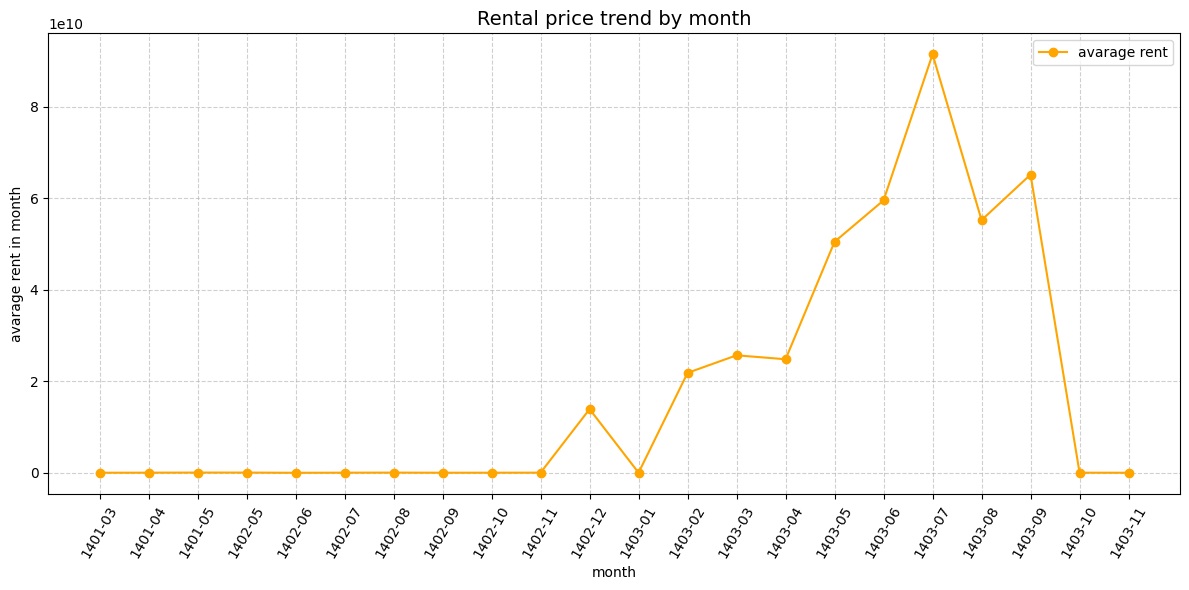

In [126]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(avg_rent_per_month["year_month_shamsi"].astype(str),
         avg_rent_per_month["avg_rent_value"],
         marker="o", color="orange", label= 'avarage rent')

plt.xticks(rotation=60)
plt.xlabel("month")
plt.ylabel('avarage rent in month')
plt.title('Rental price trend by month', fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
